In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Dongen_Master\Desktop\L2T4\Dataset .csv")


In [3]:
# Display the first few rows of the dataset
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# Display DataFrame information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [16]:
# Identify unique restaurant names
restaurant_counts = df['Restaurant Name'].value_counts()
print(restaurant_counts)


Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
Naml۱ Gurme          1
Ceviz A��ac۱         1
Huqqa                1
A���k Kahve          1
Ooma                 1
Name: count, Length: 7446, dtype: int64


In [19]:
# Filter restaurants that appear more than once
chains = restaurant_counts[restaurant_counts > 40]
print(chains)


Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: count, dtype: int64


In [18]:
# Create a DataFrame for restaurant chains
chain_df = df[df['Restaurant Name'].isin(chains.index)]

# Calculate average ratings and number of locations for each chain
chain_analysis = chain_df.groupby('Restaurant Name').agg(
    avg_rating=('Aggregate rating', 'mean'),
    num_locations=('Restaurant Name', 'count')
).reset_index()

print(chain_analysis)


    Restaurant Name  avg_rating  num_locations
0   Cafe Coffee Day    2.419277             83
1    Domino's Pizza    2.740506             79
2  Green Chick Chop    2.672549             51
3        McDonald's    3.339583             48
4            Subway    2.907937             63


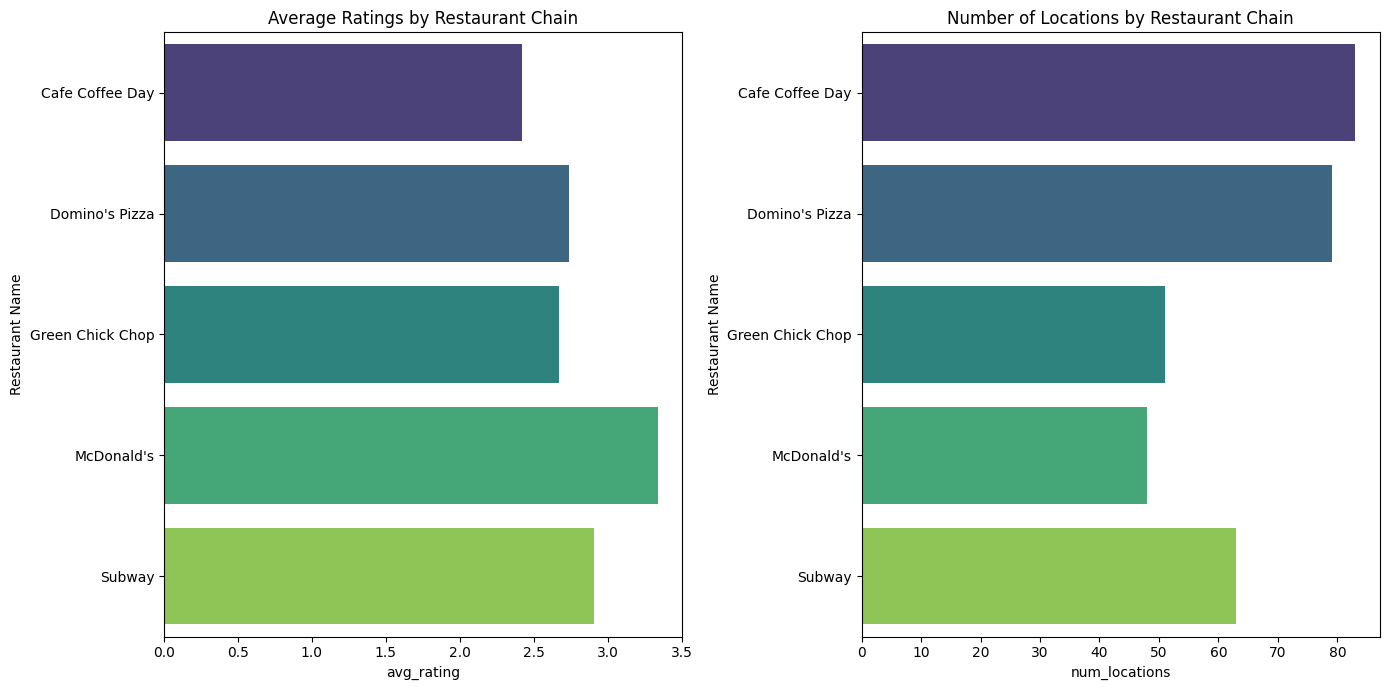

In [21]:
# Set up the figure
plt.figure(figsize=(14, 7))

# Plot average ratings
plt.subplot(1, 2, 1)
sns.barplot(x='avg_rating', y='Restaurant Name', data=chain_analysis, hue='Restaurant Name', palette='viridis', legend=False)
plt.title('Average Ratings by Restaurant Chain')

# Plot number of locations
plt.subplot(1, 2, 2)
sns.barplot(x='num_locations', y='Restaurant Name', data=chain_analysis, hue='Restaurant Name', palette='viridis', legend=False)
plt.title('Number of Locations by Restaurant Chain')

plt.tight_layout()


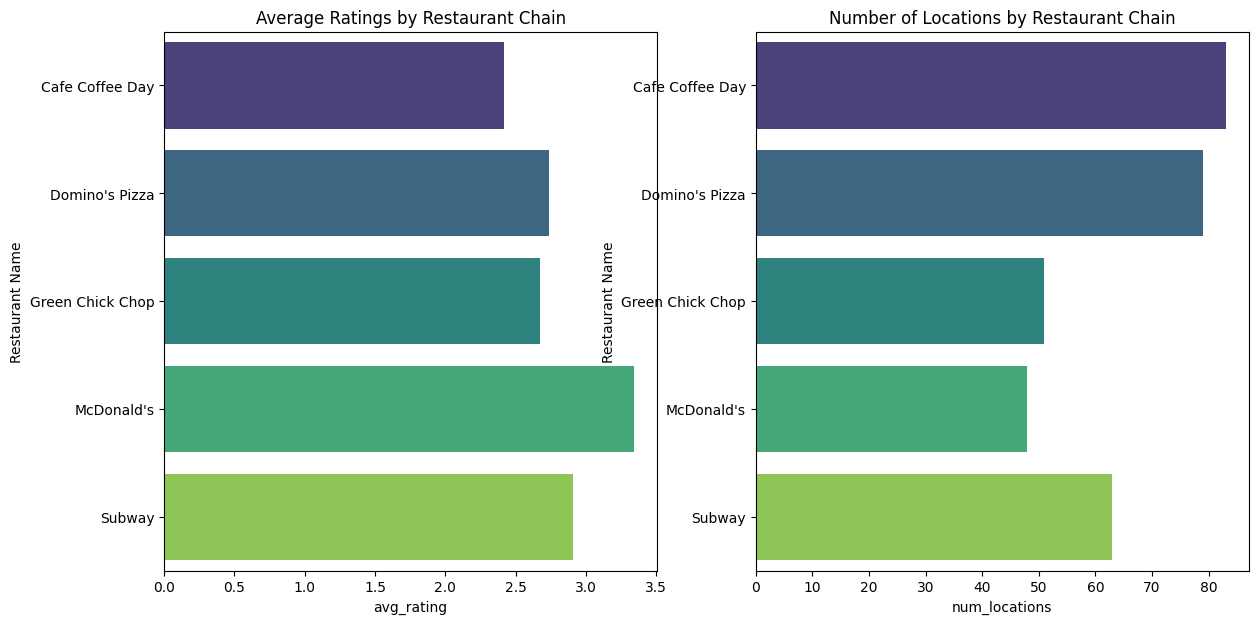

In [24]:
# Set up the figure
plt.figure(figsize=(14, 7))

# Plot average ratings with hue
plt.subplot(1, 2, 1)
sns.barplot(x='avg_rating', y='Restaurant Name', data=chain_analysis, hue='Restaurant Name', palette='viridis', legend=False)
plt.title('Average Ratings by Restaurant Chain')
plt.savefig('average_ratings_by_chain.png')

# Plot number of locations with hue
plt.subplot(1, 2, 2)
sns.barplot(x='num_locations', y='Restaurant Name', data=chain_analysis, hue='Restaurant Name', palette='viridis', legend=False)
plt.title('Number of Locations by Restaurant Chain')
plt.savefig('number_of_locations_by_chain.png')
